# 2018-12-18 Initial Results

-Single filter I-band all night

-Initially only open vs closed LS (done here)

-Added closed bin2 later (to do)

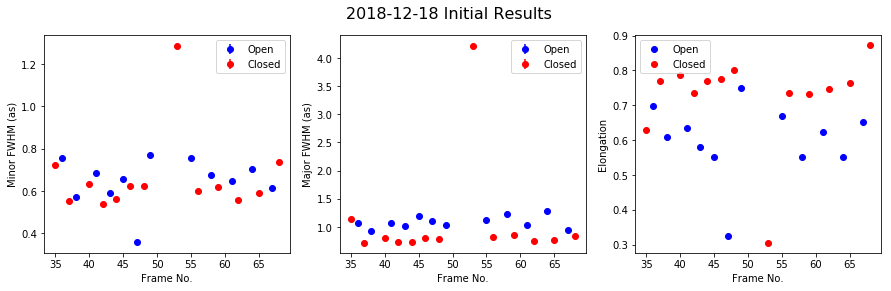

In [40]:
import numpy as np
from imaka.analysis import moffat as m
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline

file_o = "stats_open.fits"
file_c = "stats_closed_LS.fits"

plot_init(file_o, file_c)

In [35]:
def plot_init(file_o, file_c):
    
    ps = 0.12

    dat_o = Table.read(file_o, format='fits')
    dat_c = Table.read(file_c, format='fits')
    FWHM_min_o, sig_FWHM_min_o, FWHM_maj_o, sig_FWHM_maj_o = m.calc_mof_fwhm(file_o)
    FWHM_min_c, sig_FWHM_min_c, FWHM_maj_c, sig_FWHM_maj_c = m.calc_mof_fwhm(file_c)

    frame_o = []
    frame_c = []

    for name in dat_o['Image']:
        frame = name.split('obj')[1][0:3]
        frame_o.append(int(frame))

    for name in dat_c['Image']:
        frame = name.split('obj')[1][0:3]
        frame_c.append(int(frame))

    elon_o = FWHM_min_o / FWHM_maj_o
    elon_c = FWHM_min_c / FWHM_maj_c

    plt.figure(1, figsize=(15,4))

    plt.subplot(131)
    plt.errorbar(frame_o, FWHM_min_o*ps, yerr=sig_FWHM_min_o*ps, fmt='bo', label='Open')
    plt.errorbar(frame_c, FWHM_min_c*ps, yerr=sig_FWHM_min_c*ps, fmt='ro', label='Closed')
    plt.xlabel('Frame No.')
    plt.ylabel('Minor FWHM (as)')
    plt.legend()

    plt.subplot(132)
    plt.errorbar(frame_o, FWHM_maj_o*ps, yerr=sig_FWHM_maj_o*ps, fmt='bo', label='Open')
    plt.errorbar(frame_c, FWHM_maj_c*ps, yerr=sig_FWHM_maj_c*ps, fmt='ro', label='Closed')
    plt.xlabel('Frame No.')
    plt.ylabel('Major FWHM (as)')
    plt.legend()

    plt.subplot(133)
    plt.plot(frame_o, elon_o, 'bo', label='Open')
    plt.plot(frame_c, elon_c,'ro', label='Closed')
    plt.xlabel('Frame No.')
    plt.ylabel('Elongation')
    plt.legend()

    plt.suptitle('2018-12-18 Initial Results', fontsize=16)
    
    return